In [1]:
# import Depencies
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import regex
from collections import Counter


In [2]:
# Set header to circumvent webscraping blocker
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

In [3]:
# Create lists to store **responses**
job_title = []
company_name = []
short_description = []
job_location = []
job_classification = []
job_subclassification = []
job_site = []

job_counter = 0

In [4]:
# Set header to circumvent webscraping blocker
headers = {
     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

In [5]:
# Create list of scraping variables (job fields, pages[4])
job_fields = ['Data-Analyst', 'Data-Engineer']
page_scrapes = ['', '?page=2', '?page=3','?page=4','?page=5']

Scrape data

In [6]:
# Scrape data
for job_field in job_fields:
    for page in page_scrapes:
        url = f'https://www.seek.com.au/{job_field}-jobs/in-All-Australia{page}'
        
        # Make a request to the URL
        response = requests.get(url, headers=headers)
        
        # Check if the request was successful
        if response.status_code != 200:
            print(f"Failed to retrieve data from {url}")
            continue
        
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        jobs_on_page = soup.find_all('article')

        # Process each job on the page
        for job in jobs_on_page:
            job_counter += 1
            
            # Extract job details
            try:
                title = job.get('aria-label', 'N/A')
                job_title.append(title)
            except AttributeError:
                job_title.append('N/A')
                
            job_site.append("Seek.com.au")
            
            try:
                desc = job.find('span', {'data-automation': 'jobShortDescription'}).text
                short_description.append(desc)
            except AttributeError:
                short_description.append('N/A')
            
            try:
                location = job.find('a', {'data-automation': 'jobLocation'}).text
                job_location.append(location)
            except AttributeError:
                job_location.append('N/A')
            
            try:
                sub_class = job.find('a', {'data-automation': 'jobSubClassification'}).text
                job_subclassification.append(sub_class)
            except AttributeError:
                job_subclassification.append('N/A')
            
            try:
                classification = job.find('a', {'data-automation': 'jobClassification'}).text
                job_classification.append(classification)
            except AttributeError:
                job_classification.append('N/A')
            
            try:
                company = job.find('a', {'data-automation': 'jobCompany'}).text
                company_name.append(company)
            except AttributeError:
                company_name.append(np.nan)
            
            print(f'Jobs scraped: {job_counter}', end='\r')

-------



# end of scrape


In [7]:
# output the number of characters in each of the variables
print(len(company_name))
print(len(job_title))
print(len(short_description))

220
220
220


In [8]:
# dictionary named seek_data to store various pieces of information about a job
seek_data = {'job_title': job_title,
            'company_name': company_name,
            'short_description': short_description,
            'job_location': job_location,
            'job_classification': job_classification,
            'job_subclassification': job_subclassification,
            'job_site' : job_site
             }

In [9]:
# create a DataFrame
seek_data_df = pd.DataFrame(seek_data)
# reset Index:
seek_data_df.reset_index(inplace=True)
# rename Index Column
seek_data_df.rename(columns= {'index':'job_id'}, inplace=True)
# display the Last 150 Rows
seek_data_df.tail(150)

,job_id,job_title,company_name,short_description,job_location,job_classification,job_subclassification,job_site
70,70,Junior Data Migration Analysts,RGP,Join our team as a Junior Data Migration Analy...,Sydney NSW,(Information & Communication Technology),Business/Systems Analysts,Seek.com.au
71,71,Data & BI Analyst,Credabl Pty Ltd,Join our Data and BI team to turn data into in...,Sydney NSW,(Information & Communication Technology),Business/Systems Analysts,Seek.com.au
72,72,Online Data Analyst - Australia,TELUS International AI INC,TELUS International AI-Data Solutions partners...,Brisbane QLD,(Information & Communication Technology),Other,Seek.com.au
73,73,A07 Data Analyst,Davidson,Seeking an experienced Data Analyst for an ini...,Brisbane QLD,(Information & Communication Technology),Other,Seek.com.au
74,74,Business/Data Analyst - Telematics Fleet Manag...,IntelliTrac,An exciting opportunity for a business/data an...,Bundoora,"(Manufacturing, Transport & Logistics)",Analysis & Reporting,Seek.com.au
...,...,...,...,...,...,...,...,...
215,215,Data Engineer,Heritage and People's Choice,We are looking for a skilled Data Engineer to ...,Brisbane QLD,(Information & Communication Technology),Database Development & Administration,Seek.com.au
216,216,Data Engineer,ASC,Work in our Data & Analytics team to deliver a...,Osborne,(Information & Communication Technology),Engineering - Software,Seek.com.au
217,217,Senior Data Engineer,Troocoo,Senior Data Engineer role for an ASX listed te...,Sydney NSW,(Information & Communication Technology),Engineering - Software,Seek.com.au
218,218,CONTRACT Data Engineer (Junior to Mid-Level),Correlate Resources,Data Engineer with strong AWS expertise to des...,Brisbane QLD,(Information & Communication Technology),Engineering - Network,Seek.com.au


In [10]:
# check the data types
print(seek_data_df.dtypes)

job_id                    int64
job_title                object
company_name             object
short_description        object
job_location             object
job_classification       object
job_subclassification    object
job_site                 object
dtype: object


In [11]:
# Function to remove specific characters like parentheses
def remove_parentheses(text):
    if isinstance(text, str):  # Ensure the input is a string
        text = text.replace('(', '')  # Remove opening parenthesis
        text = text.replace(')', '')  # Remove closing parenthesis
        return text
    return text

# Apply the function to each element in the DataFrame
seek_data_df_cleaned = seek_data_df.apply(lambda col: col.map(remove_parentheses) if col.dtype == 'object' else col)

# Display the cleaned DataFrame
seek_data_df_cleaned

,job_id,job_title,company_name,short_description,job_location,job_classification,job_subclassification,job_site
0,0,Data Analyst,Martin Brower,"If you have a strong analytical mindset, excel...",Wetherill Park,Information & Communication Technology,Business/Systems Analysts,Seek.com.au
1,1,Senior Data Analyst,Wesfarmers Health,Play a key role in shaping the future of healt...,Melbourne VIC,Information & Communication Technology,Other,Seek.com.au
2,2,Data Analyst,Monash University,Enhance strategic decision-making as a Data An...,Melbourne VIC,Consulting & Strategy,Analysts,Seek.com.au
3,3,Data Analyst,Adelaide Primary Health Network Limited,"Opportunity for a Data Analyst, with a health ...",Mile End,Information & Communication Technology,Business/Systems Analysts,Seek.com.au
4,4,Data Analyst,Mars Recruitment,We are currently supporting a leading tier one...,Perth WA,Information & Communication Technology,Business/Systems Analysts,Seek.com.au
...,...,...,...,...,...,...,...,...
215,215,Data Engineer,Heritage and People's Choice,We are looking for a skilled Data Engineer to ...,Brisbane QLD,Information & Communication Technology,Database Development & Administration,Seek.com.au
216,216,Data Engineer,ASC,Work in our Data & Analytics team to deliver a...,Osborne,Information & Communication Technology,Engineering - Software,Seek.com.au
217,217,Senior Data Engineer,Troocoo,Senior Data Engineer role for an ASX listed te...,Sydney NSW,Information & Communication Technology,Engineering - Software,Seek.com.au
218,218,CONTRACT Data Engineer Junior to Mid-Level,Correlate Resources,Data Engineer with strong AWS expertise to des...,Brisbane QLD,Information & Communication Technology,Engineering - Network,Seek.com.au


In [12]:
# Identify duplicate rows
duplicates = seek_data_df_cleaned[seek_data_df_cleaned.duplicated()]

print("Duplicate rows based on all columns:")
print(duplicates)

Duplicate rows based on all columns:
Empty DataFrame
Columns: [job_id, job_title, company_name, short_description, job_location, job_classification, job_subclassification, job_site]
Index: []


In [13]:
# Count the occurrences of each job classification
job_classification_counts = seek_data_df_cleaned['job_classification'].value_counts()
# Display the counts
job_classification_counts

job_classification
Information & Communication Technology    177
Government & Defence                       11
Manufacturing, Transport & Logistics        8
Consulting & Strategy                       4
Banking & Financial Services                4
Healthcare & Medical                        4
Accounting                                  3
Retail & Consumer Products                  2
Mining, Resources & Energy                  2
Marketing & Communications                  1
Sales                                       1
Community Services & Development            1
Engineering                                 1
Science & Technology                        1
Name: count, dtype: int64

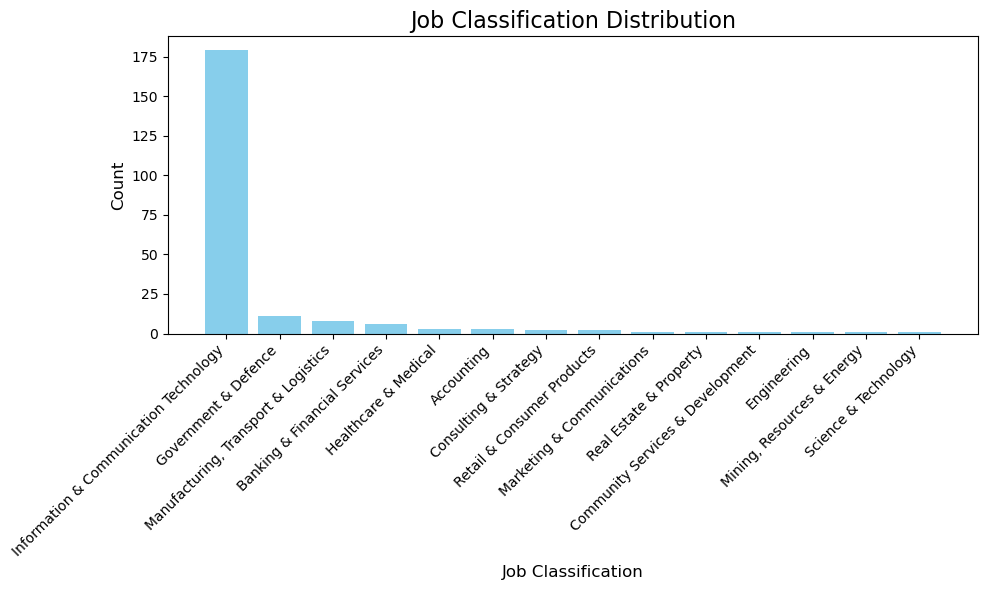

In [14]:
#show a bar chart for job classification
data = {
    'Job Classification': [
        'Information & Communication Technology', 'Government & Defence', 'Manufacturing, Transport & Logistics',
        'Banking & Financial Services', 'Healthcare & Medical', 'Accounting', 'Consulting & Strategy',
        'Retail & Consumer Products', 'Marketing & Communications', 'Real Estate & Property',
        'Community Services & Development', 'Engineering', 'Mining, Resources & Energy', 'Science & Technology'
    ],
      'Count': [179, 11, 8, 6, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1]
}
# Create a DataFrame from the data
df_job_classification = pd.DataFrame(data)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_job_classification['Job Classification'], df_job_classification['Count'], color='skyblue')
# Adding chart title and labels
plt.title('Job Classification Distribution', fontsize=16)
plt.xlabel('Job Classification', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Adjust layout for better display
plt.tight_layout()
# Display the chart
plt.show()


In [15]:
# Count the occurrences of each job classification
job_subclassification_counts = seek_data_df_cleaned['job_subclassification'].value_counts()

# Display the counts
print(job_subclassification_counts)

job_subclassification
Business/Systems Analysts                         47
Engineering - Software                            47
Database Development & Administration             42
Other                                             23
Analysis & Reporting                              18
Developers/Programmers                            11
Government - Federal                               5
Consultants                                        5
Analysts                                           4
Government - State                                 3
Engineering - Network                              3
Policy, Planning & Regulation                      2
Architects                                         2
Community Development                              1
Clinical/Medical Research                          1
Telecommunications                                 1
Government - Local                                 1
Market Research & Analysis                         1
Help Desk & IT Support  

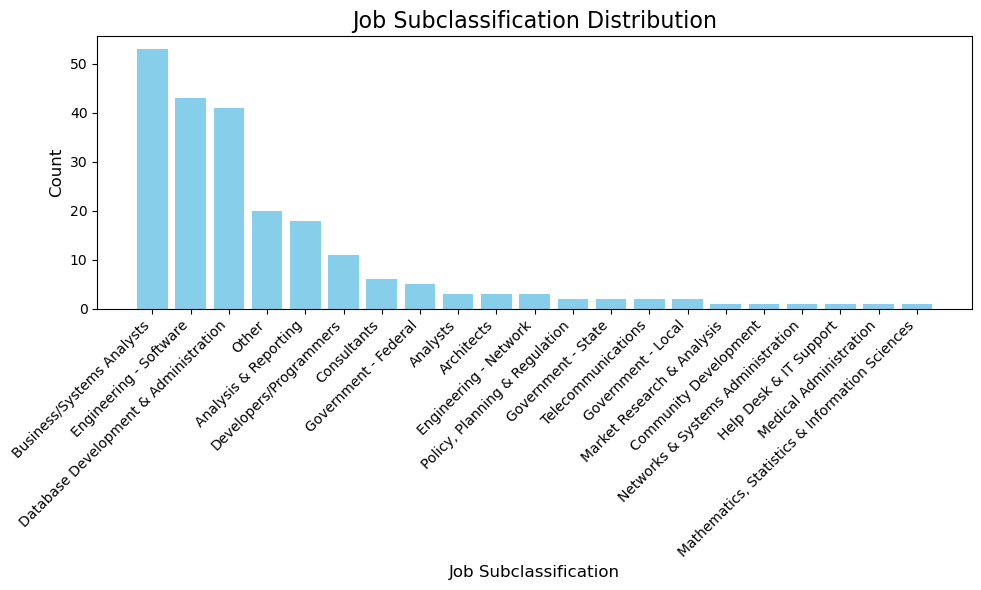

In [16]:
#show a bar chart for job classification

data = {
    'Job Subclassification': [
        'Business/Systems Analysts', 'Engineering - Software', 'Database Development & Administration',
        'Other', 'Analysis & Reporting', 'Developers/Programmers', 'Consultants',
        'Government - Federal', 'Analysts', 'Architects', 
        'Engineering - Network', 'Policy, Planning & Regulation', 
        'Government - State', 'Telecommunications','Government - Local',
        'Market Research & Analysis','Community Development','Networks & Systems Administration',
        'Help Desk & IT Support','Medical Administration','Mathematics, Statistics & Information Sciences'
    ],
    'Count': [53,43,41,20,18,11,6,5,3,3,3,2,2,2,2,1,1,1,1,1,1]
}

# Create a DataFrame from the data
df_job_subclassification = pd.DataFrame(data)
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_job_subclassification['Job Subclassification'], df_job_subclassification['Count'], color='skyblue')

# Adding chart title and labels
plt.title('Job Subclassification Distribution', fontsize=16)
plt.xlabel('Job Subclassification', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout for better display
plt.tight_layout()

# Display the chart
plt.show()

---

## Create dataframes for tables

---

In [17]:
# Create job_id dataframe

job_id_df = seek_data_df_cleaned[['job_id', 'job_classification', 'job_location']].copy()

# rename columns to match schema
job_id_df.rename(columns= {'job_classification':'job_field'}, inplace=True)

job_id_df

,job_id,job_field,job_location
0,0,Information & Communication Technology,Wetherill Park
1,1,Information & Communication Technology,Melbourne VIC
2,2,Consulting & Strategy,Melbourne VIC
3,3,Information & Communication Technology,Mile End
4,4,Information & Communication Technology,Perth WA
...,...,...,...
215,215,Information & Communication Technology,Brisbane QLD
216,216,Information & Communication Technology,Osborne
217,217,Information & Communication Technology,Sydney NSW
218,218,Information & Communication Technology,Brisbane QLD


### Count words to plot - All Employment Fields

In [18]:
# Word Cloud Data

full_count = (seek_data_df['short_description'].str.split(expand=True)
              .stack())
full_count_df = pd.DataFrame(full_count)
full_count_df = full_count_df[full_count_df[0].str.len() > 4]
full_count_df

0
0   4       strong
    5   analytical
    6     mindset,
    7    excellent
    8    attention
...            ...
219 15       large
    16   analytics
    17    project.
    19       month
    20       fixed

[2028 rows x 1 columns]

In [19]:
# count, tally and describe words in short_description

seek_count = (seek_data_df['short_description'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('word')
              .reset_index(name='count'))

In [20]:
seek_count = seek_count[seek_count['word'].str.len() > 4]
seek_count

,word,count
11,Engineer,43
12,Analyst,36
24,seeking,21
25,contract,20
27,opportunity,19
...,...,...
1234,Fixed,1
1235,"term,",1
1236,Burnley,1
1237,Office,1


In [21]:
seek_count.head(45)

,word,count
11,Engineer,43
12,Analyst,36
24,seeking,21
25,contract,20
27,opportunity,19
29,business,16
34,support,12
35,within,12
40,large,10
41,Seeking,10


### Count words to plot - Individual fields (Data-Analyst, Data-Visualisation)

In [22]:
# Create DF for each job field

data_analyst_df = seek_data_df_cleaned[seek_data_df_cleaned['job_classification']=='Banking & Financial Services']
data_engineer_df = seek_data_df_cleaned[seek_data_df_cleaned['job_classification']=='Information & Communication Technology']

In [23]:
# create word count DF for each job field
# word cloud
# count, tally and describe words in short_description

# data_analyst

data_analyst_count = (data_analyst_df['short_description'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('word')
              .reset_index(name='count'))

# data_engineer

data_engineer_count = (data_engineer_df['short_description'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('word')
              .reset_index(name='count'))

In [24]:
# data_analyst

# Flatten the DataFrame, split into words, and remove non-word characters
data_analyst_set = data_analyst_df.stack().str.split(r'\W+', expand=False).explode().tolist()

# Convert to DataFrame
data_analyst_count_df = pd.DataFrame(data_analyst_set, columns=['Word'])
# Filter words with length greater than 4 characters
data_analyst_count_df = data_analyst_count_df[data_analyst_count_df['Word'].str.len() > 4]
# Count frequencies of each word
data_analyst_count_df = data_analyst_count_df['Word'].value_counts().reset_index()
data_analyst_count_df.columns = ['Word', 'Count']

# data_engineer

# Flatten the DataFrame, split into words, and remove non-word characters
data_engineer_set = data_engineer_df.stack().str.split(r'\W+', expand=False).explode().tolist()

# Convert to DataFrame
data_engineer_count_df = pd.DataFrame(data_engineer_set, columns=['Word'])
# Filter words with length greater than 4 characters
data_engineer_count_df = data_engineer_count_df[data_engineer_count_df['Word'].str.len() > 4]
# Count frequencies of each word
data_engineer_count_df = data_engineer_count_df['Word'].value_counts().reset_index()
data_engineer_count_df.columns = ['Word', 'Count']

# Display the result
data_engineer_count_df.head(40)

,Word,Count
0,Technology,184
1,Information,180
2,Communication,177
3,Engineer,146
4,Analyst,94
5,Business,63
6,Engineering,55
7,Sydney,53
8,Analysts,51
9,Systems,50


In [25]:
# Convert the column to string type before applying string operations
data_analyst_count['word'] = data_analyst_count['word'].astype(str)
data_engineer_count['word'] = data_engineer_count['word'].astype(str)

In [26]:
# line filters to keep only the rows where the length of the string in the 'word' column is greater than 4
data_analyst_count = data_analyst_count[data_analyst_count['word'].str.len() > 4]
data_engineer_count = data_engineer_count[data_engineer_count['word'].str.len() > 4]

In [27]:
# print the result
print("Data Analyst Count:")
print(data_engineer_count)

Data Analyst Count:
                    word  count
8               Engineer     42
19               Analyst     20
21              contract     16
24               seeking     15
28           opportunity     14
...                  ...    ...
1054           Cremorne.      1
1055               team,      1
1056  Telecommunications      1
1057            Analysts      1
1058               fixed      1

[836 rows x 2 columns]


### Count locations to plot

-----

In [28]:
# create df for location counts 
# heatmap plot

all_fields_locations = seek_data_df_cleaned['job_location'].value_counts()
data_analyst_locations = data_analyst_df['job_location'].value_counts()
data_engineer_locations = data_engineer_df['job_location'].value_counts()


all_fields_locations_df = pd.DataFrame(all_fields_locations)
data_analyst_locations_df = pd.DataFrame(data_analyst_locations)
data_engineer_locations_df = pd.DataFrame(data_engineer_locations)

all_fields_locations_df

,count
job_location,
Sydney NSW,51
Canberra ACT,34
Melbourne VIC,28
Brisbane QLD,23
Perth WA,12
Adelaide SA,6
Wetherill Park,3
North Sydney,3
Richmond,3


In [29]:
# reset index for tables
all_fields_locations_df.reset_index(inplace=True)

In [30]:
all_fields_locations_df

,job_location,count
0,Sydney NSW,51
1,Canberra ACT,34
2,Melbourne VIC,28
3,Brisbane QLD,23
4,Perth WA,12
5,Adelaide SA,6
6,Wetherill Park,3
7,North Sydney,3
8,Richmond,3
9,Belmont,2


------

### Connect to postgres and load data to db

-----

In [31]:
# MOVE TO TOP BEFORE SUBMITTING
from sqlalchemy import create_engine
from sqlalchemy import inspect
import psycopg2

In [35]:
# Define the connection parameters
protocol = 'postgresql'
username = 'postgres'
password = "password"

host = 'localhost'

port = 5432

database_name = 'Project_3_1'

# Create the connection string
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
# Create an engine
engine = create_engine(rds_connection_string)
# Connect to the database
insp = inspect(engine)

insp.get_table_names()

['job_id',
 'data_analyst_scrapes',
 'data_engineer_scrapes',
 'data_analyst_word_count',
 'data_engineer_word_count',
 'allfields_location_count']

In [36]:
data_engineer_df

,job_id,job_title,company_name,short_description,job_location,job_classification,job_subclassification,job_site
0,0,Data Analyst,Martin Brower,"If you have a strong analytical mindset, excel...",Wetherill Park,Information & Communication Technology,Business/Systems Analysts,Seek.com.au
1,1,Senior Data Analyst,Wesfarmers Health,Play a key role in shaping the future of healt...,Melbourne VIC,Information & Communication Technology,Other,Seek.com.au
3,3,Data Analyst,Adelaide Primary Health Network Limited,"Opportunity for a Data Analyst, with a health ...",Mile End,Information & Communication Technology,Business/Systems Analysts,Seek.com.au
4,4,Data Analyst,Mars Recruitment,We are currently supporting a leading tier one...,Perth WA,Information & Communication Technology,Business/Systems Analysts,Seek.com.au
7,7,Data Analysts,Exclaim IT,"Data Analyst, Data Modeller, Data Scientist",Canberra ACT,Information & Communication Technology,Other,Seek.com.au
...,...,...,...,...,...,...,...,...
215,215,Data Engineer,Heritage and People's Choice,We are looking for a skilled Data Engineer to ...,Brisbane QLD,Information & Communication Technology,Database Development & Administration,Seek.com.au
216,216,Data Engineer,ASC,Work in our Data & Analytics team to deliver a...,Osborne,Information & Communication Technology,Engineering - Software,Seek.com.au
217,217,Senior Data Engineer,Troocoo,Senior Data Engineer role for an ASX listed te...,Sydney NSW,Information & Communication Technology,Engineering - Software,Seek.com.au
218,218,CONTRACT Data Engineer Junior to Mid-Level,Correlate Resources,Data Engineer with strong AWS expertise to des...,Brisbane QLD,Information & Communication Technology,Engineering - Network,Seek.com.au


In [37]:
# load to database

# Job_ID Table

job_id_df.to_sql(name='job_id', con=engine, if_exists='append', index=False)

## Scraped job Tables

data_analyst_df.to_sql(name='data_analyst_scrapes', con=engine, if_exists='append', index=False)
data_engineer_df.to_sql(name='data_engineer_scrapes', con=engine, if_exists='append', index=False)

177

In [38]:
pd.read_sql_query('select * from data_analyst_scrapes', con=engine).head(15)

,job_id,job_title,company_name,short_description,job_location,job_classification,job_subclassification,job_site
0,8,Data Analyst,NES Fircroft,Join a key project for a Tier One Mining organ...,Perth WA,Banking & Financial Services,Analysis & Reporting,Seek.com.au
1,27,Graduate Insights Analyst,BIG,Exciting opportunity to work in a collaborativ...,North Sydney,Banking & Financial Services,Analysis & Reporting,Seek.com.au
2,33,Data Analyst,"Talent – Specialists in tech, transformation &...","Our client is a leading financial institution,...",Sydney NSW,Banking & Financial Services,Analysis & Reporting,Seek.com.au
3,79,Investment Data Analyst,CBUS Super,Come be a part of team that focuses on deliver...,Melbourne VIC,Banking & Financial Services,Analysis & Reporting,Seek.com.au


In [39]:
# ## Word counts

data_analyst_count.to_sql(name='data_analyst_word_count', con=engine, if_exists='append', index=False)
data_engineer_count.to_sql(name='data_engineer_word_count', con=engine, if_exists='append', index=False)

836

In [40]:
pd.read_sql_query('select * from data_engineer_word_count', con=engine).head(15)

,word,count
0,Engineer,42
1,Analyst,20
2,contract,16
3,seeking,15
4,opportunity,14
5,within,12
6,business,11
7,support,10
8,large,9
9,Senior,9


In [41]:
all_fields_locations_df.to_sql(name='allfields_location_count', con=engine, if_exists='append', index=False)

58

In [42]:
pd.read_sql_query('select * from allfields_location_count', con=engine).head(15)

,job_location,count
0,Sydney NSW,51
1,Canberra ACT,34
2,Melbourne VIC,28
3,Brisbane QLD,23
4,Perth WA,12
5,Adelaide SA,6
6,Wetherill Park,3
7,North Sydney,3
8,Richmond,3
9,Belmont,2
